In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

# Define functions for reading and transposing data
def read_data_excel(excel_url, sheet_name, new_cols, countries):
    data_read = pd.read_excel(excel_url, sheet_name=sheet_name, skiprows=3)
    data_read = data_read[new_cols]
    data_read.set_index('Country Name', inplace=True)
    data_read = data_read.loc[countries]
    return data_read, data_read.T

from sklearn.impute import SimpleImputer

def perform_clustering(data, num_clusters):
    # Impute missing values using the mean
    imputer = SimpleImputer(strategy='mean')
    numeric_data_imputed = imputer.fit_transform(data.select_dtypes(include=[np.number]))

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clustered_data = data.copy()
    clustered_data['Cluster'] = kmeans.fit_predict(numeric_data_imputed)

    return clustered_data, kmeans


# Function to fit a curve using curve_fit
def perform_curve_fit(x, y, func):
    x_numeric = pd.to_numeric(x, errors='coerce')
    y_numeric = pd.to_numeric(y, errors='coerce')
    xy_numeric = pd.DataFrame({'x': x_numeric, 'y': y_numeric}).dropna()  # Combine x and y into a DataFrame and drop NaN values
    if not xy_numeric.empty:
        popt, pcov = curve_fit(func, xy_numeric['x'], xy_numeric['y'])
        return popt, pcov
    else:
        print("No numeric values available for curve fitting.")
        return None, None

# Simple exponential growth function for curve fitting
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

# Function to plot clustering results and curve fitting
def plot_results(data, x_col, y_col, cluster_col, func, title, kmeans):
    plt.figure(figsize=(20, 8))
    
    # Plot clustering results
    plt.scatter(data.index, data[y_col], c=data[cluster_col], cmap='viridis', s=50, alpha=0.8, edgecolors='w')
    
    # Plot cluster centers
    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    
    # Plot curve fitting
    x_fit_values = pd.to_numeric(data.index, errors='coerce').dropna()
    
    if not x_fit_values.empty:
        x_fit = np.linspace(min(x_fit_values), max(x_fit_values), 100)
        y_fit = func(x_fit, *popt)
        plt.plot(x_fit, y_fit, '--', color='black', label='Curve Fit')
    else:
        print("No numeric values available for curve fitting.")
    
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

# The Excel URL below indicates CO2 emissions (metric tons per capita)
excel_url_CO2 = 'https://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=excel'

# Parameters for reading and transposing data
sheet_name = 'Data'
new_cols = ['Country Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
countries = ['Germany', 'United States', 'United Kingdom', 'Pakistan', 'China', 'India', 'Norway']

# # Read and transpose CO2 emissions data
# data_CO2, data_CO2_transpose = read_data_excel(excel_url_CO2, sheet_name, new_cols, countries)
# Read and transpose CO2 emissions data
data_CO2, data_CO2_transpose = read_data_excel(excel_url_CO2, sheet_name, new_cols, countries)
# Perform clustering on CO2 emissions data
num_clusters = 3  # You can adjust the number of clusters
data_CO2_clustered, kmeans = perform_clustering(data_CO2, num_clusters)

# Fit an exponential growth curve to CO2 emissions data

x_col = 'Country Name'
y_col = '2010'  # You can choose any year
# Fit an exponential growth curve to CO2 emissions data for each country
for country in data_CO2.index:
    popt, pcov = perform_curve_fit(new_cols[1:], data_CO2.loc[country, new_cols[1:]], exponential_growth)
    if popt is not None:
        print(f"Curve parameters for {country}: {popt}")

# Plot clustering results and curve fitting for CO2 emissions
plot_results(data_CO2_clustered, x_col, y_col, 'Cluster', exponential_growth, 'Clustering and Curve Fitting for CO2 emissions', kmeans)



CO2 emissions data for Germany:
      Year  CO2 emissions (%)
2010  2010           9.453389
2011  2011           9.299003
2012  2012           9.451289
2013  2013           9.624229
2014  2014           9.088528
2015  2015           9.087345
2016  2016           9.072972
2017  2017           8.858345
2018  2018           8.537043
2019  2019           7.927188
2020  2020           7.255221
2021  2021                NaN
2022  2022                NaN


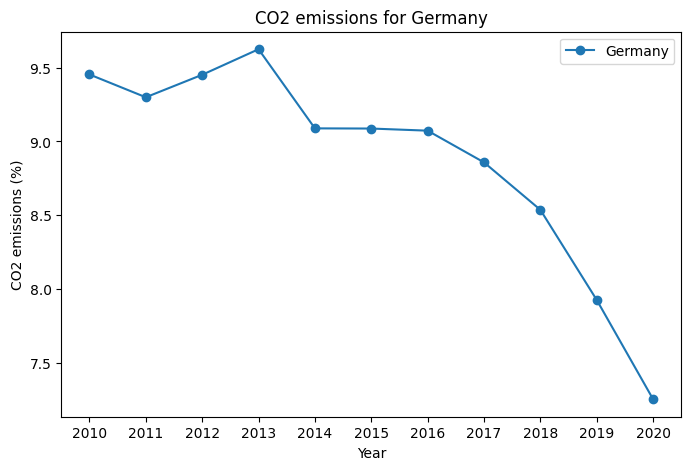


CO2 emissions data for United States:
      Year  CO2 emissions (%)
2010  2010          17.431737
2011  2011          16.604190
2012  2012          15.789760
2013  2013          16.111175
2014  2014          16.040917
2015  2015          15.560015
2016  2016          15.149883
2017  2017          14.823245
2018  2018          15.222518
2019  2019          14.673381
2020  2020          13.032828
2021  2021                NaN
2022  2022                NaN


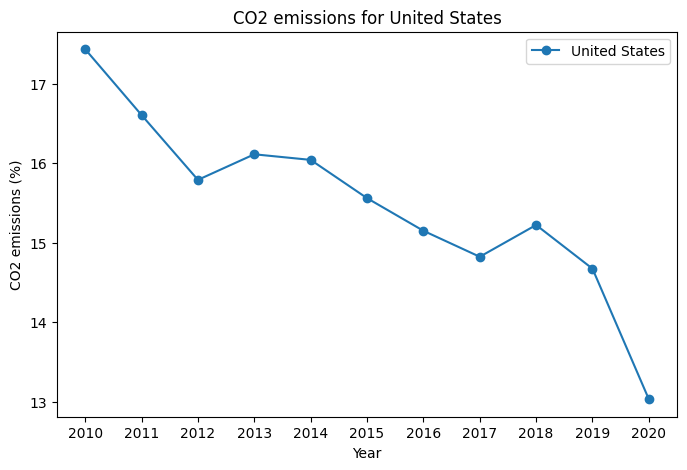


CO2 emissions data for United Kingdom:
      Year  CO2 emissions (%)
2010  2010           7.689567
2011  2011           7.044843
2012  2012           7.344261
2013  2013           7.076100
2014  2014           6.433347
2015  2015           6.159376
2016  2016           5.824503
2017  2017           5.553291
2018  2018           5.425128
2019  2019           5.175842
2020  2020           4.601142
2021  2021                NaN
2022  2022                NaN


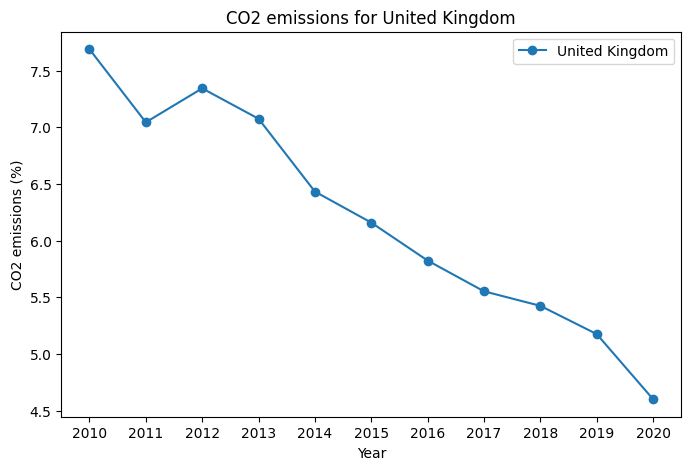


CO2 emissions data for Pakistan:
      Year  CO2 emissions (%)
2010  2010           0.721910
2011  2011           0.713434
2012  2012           0.711251
2013  2013           0.710994
2014  2014           0.740619
2015  2015           0.778086
2016  2016           0.848207
2017  2017           0.918473
2018  2018           0.850427
2019  2019           0.824460
2020  2020           0.810360
2021  2021                NaN
2022  2022                NaN


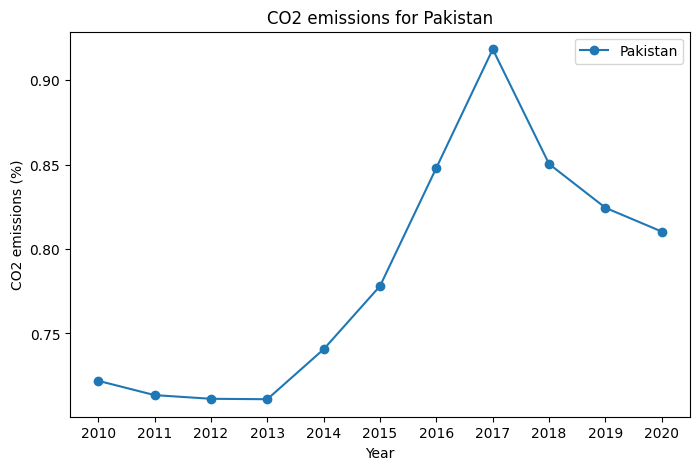


CO2 emissions data for China:
      Year  CO2 emissions (%)
2010  2010           6.335420
2011  2011           6.901347
2012  2012           7.045200
2013  2013           7.320155
2014  2014           7.304713
2015  2015           7.145132
2016  2016           7.105480
2017  2017           7.226160
2018  2018           7.533193
2019  2019           7.645436
2020  2020           7.756138
2021  2021                NaN
2022  2022                NaN


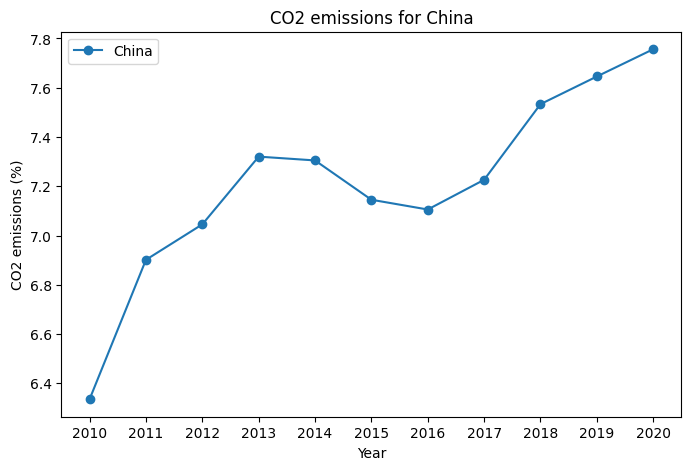


CO2 emissions data for India:
      Year  CO2 emissions (%)
2010  2010           1.338034
2011  2011           1.396878
2012  2012           1.498204
2013  2013           1.527674
2014  2014           1.642465
2015  2015           1.631323
2016  2016           1.639914
2017  2017           1.704927
2018  2018           1.795595
2019  2019           1.752534
2020  2020           1.576093
2021  2021                NaN
2022  2022                NaN


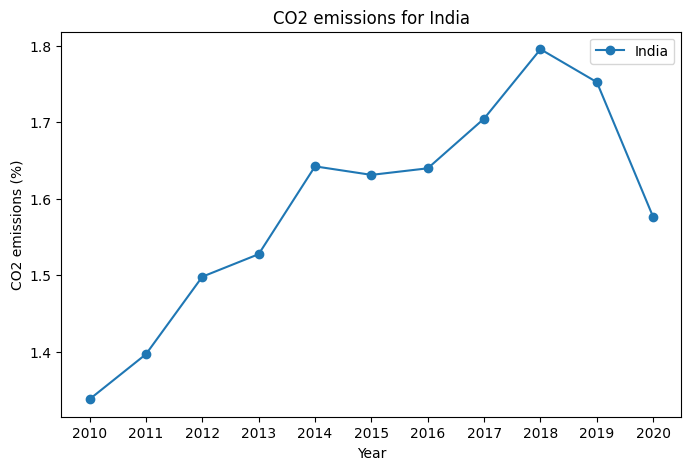


CO2 emissions data for Norway:
      Year  CO2 emissions (%)
2010  2010           8.205018
2011  2011           7.888271
2012  2012           7.725324
2013  2013           7.801169
2014  2014           7.716802
2015  2015           7.764859
2016  2016           7.561039
2017  2017           7.423752
2018  2018           7.261316
2019  2019           7.042321
2020  2020           6.725080
2021  2021                NaN
2022  2022                NaN


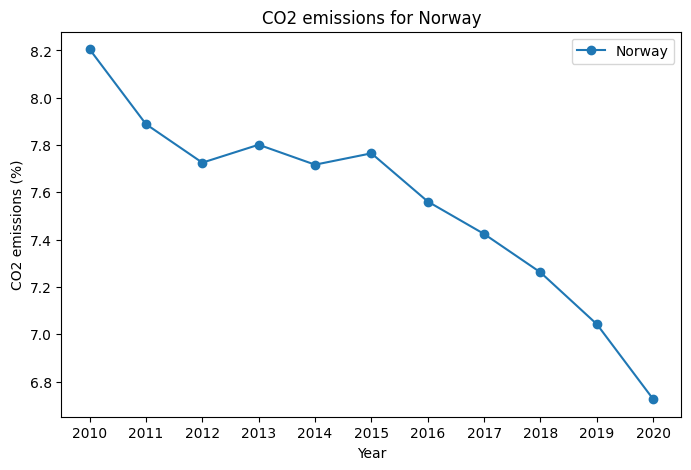

In [ ]:
# Visualize CO2 Emission data for each country and print values
for country in data_CO2.index:
    x_values = new_cols[1:]
    y_values = data_CO2.loc[country, new_cols[1:]]

    print(f"\nCO2 emissions data for {country}:")
    print(pd.DataFrame({'Year': x_values, 'CO2 emissions (%)': y_values}))

    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, marker='o', label=country)
    plt.title(f'CO2 emissions for {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 emissions (%)')
    plt.legend()
    plt.show()


In [ ]:
# Define logistic function for curve fitting
def logistic_function(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))



Fitting Curves for CO2 emissoin in Germany:
Exponential CO2 emissoin Parameters for Germany: [1. 1.]
Logistic CO2 emissoin Parameters for Germany: [8.87768643 1.         1.        ]


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\1606063899.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


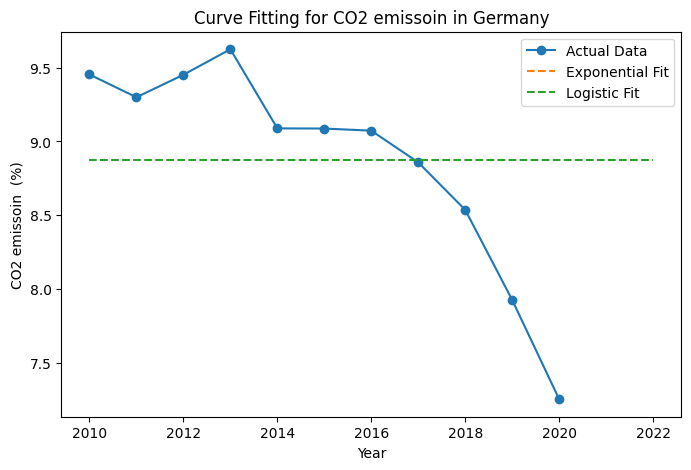


Fitting Curves for CO2 emissoin in United States:
Exponential CO2 emissoin Parameters for United States: [1. 1.]
Logistic CO2 emissoin Parameters for United States: [15.49451356  1.          1.        ]


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\1606063899.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


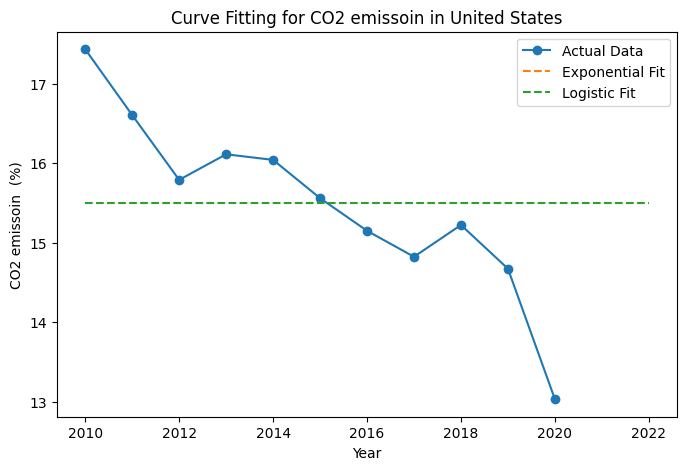


Fitting Curves for CO2 emissoin in United Kingdom:
Exponential CO2 emissoin Parameters for United Kingdom: [1. 1.]
Logistic CO2 emissoin Parameters for United Kingdom: [6.21158207 1.         1.        ]


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\1606063899.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


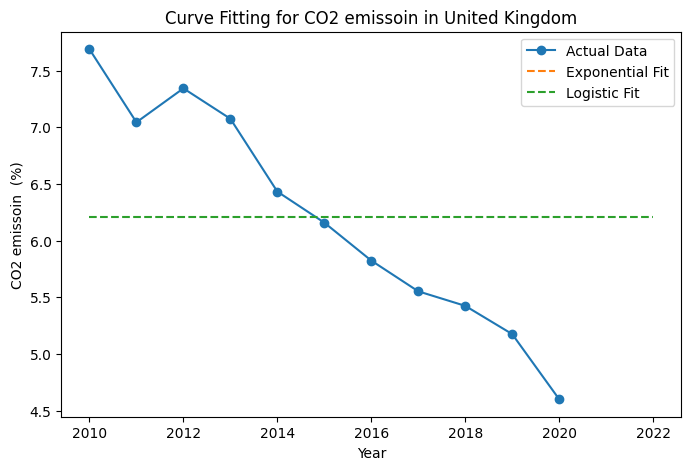


Fitting Curves for CO2 emissoin in Pakistan:
Exponential CO2 emissoin Parameters for Pakistan: [1. 1.]
Logistic CO2 emissoin Parameters for Pakistan: [0.78438373 1.         1.        ]


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\1606063899.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


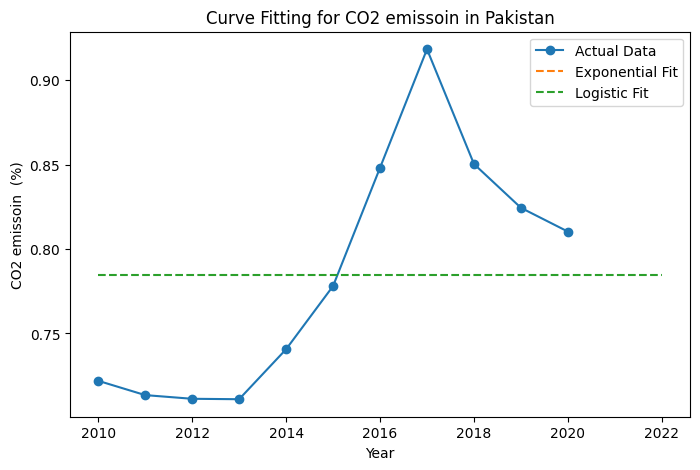


Fitting Curves for CO2 emissoin in China:
Exponential CO2 emissoin Parameters for China: [1. 1.]
Logistic CO2 emissoin Parameters for China: [7.21076123 1.         1.        ]


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\1606063899.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


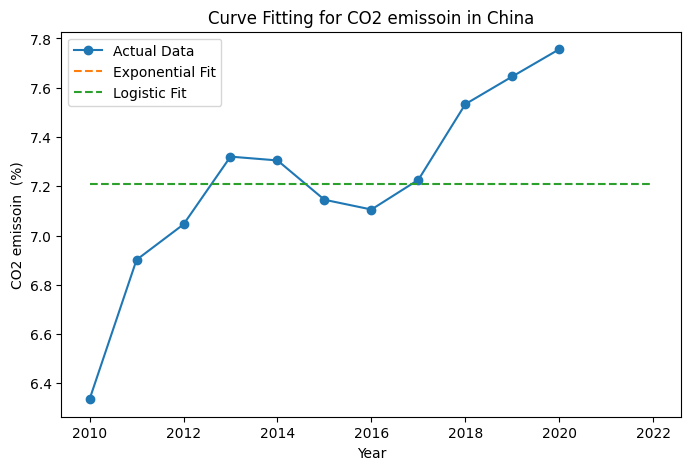


Fitting Curves for CO2 emissoin in India:
Exponential CO2 emissoin Parameters for India: [1. 1.]
Logistic CO2 emissoin Parameters for India: [1.5912403 1.        1.       ]


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\1606063899.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


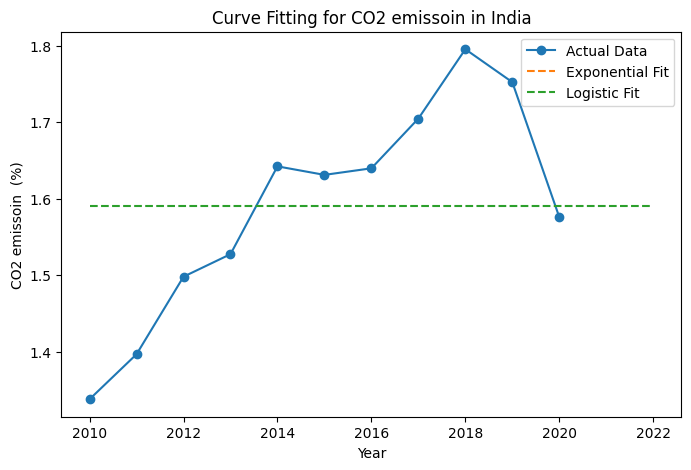


Fitting Curves for CO2 emissoin in Norway:
Exponential CO2 emissoin Parameters for Norway: [1. 1.]
Logistic CO2 emissoin Parameters for Norway: [7.55590447 1.         1.        ]


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\1606063899.py:45: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


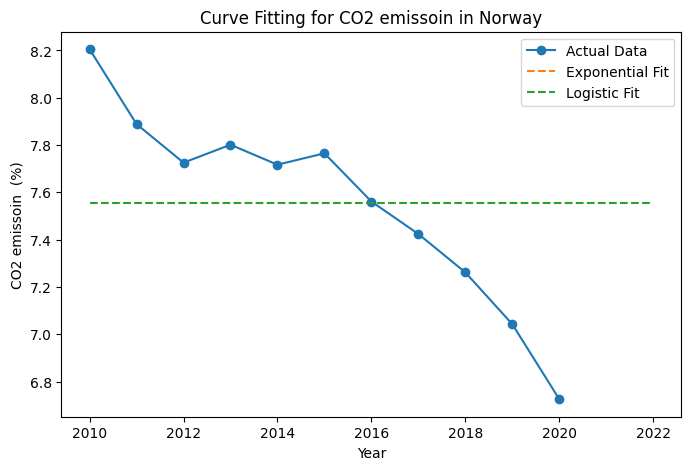

In [ ]:
# Fit exponential and logistic growth curves for each country
for country in data_CO2.index:
    x_values = pd.to_numeric(new_cols[1:], errors='coerce')
    y_values = data_CO2.loc[country, new_cols[1:]]

    print(f"\nFitting Curves for CO2 emissoin in {country}:")

    # Exponential growth curve fitting
    popt_exp, pcov_exp = perform_curve_fit(x_values, y_values, exponential_growth)
    if popt_exp is not None:
        print(f"Exponential CO2 emissoin Parameters for {country}: {popt_exp}")

    # Logistic growth curve fitting
    popt_log, pcov_log = perform_curve_fit(x_values, y_values, logistic_function)
    if popt_log is not None:
        print(f"Logistic CO2 emissoin Parameters for {country}: {popt_log}")

    # Visualize the data and fitted curves
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, marker='o', label='Actual Data')
    
    if popt_exp is not None:
        y_fit_exp = exponential_growth(x_values, *popt_exp)
        plt.plot(x_values, y_fit_exp, '--', label='Exponential Fit')
    
    if popt_log is not None:
        y_fit_log = logistic_function(x_values, *popt_log)
        plt.plot(x_values, y_fit_log, '--', label='Logistic Fit')

    plt.title(f'Curve Fitting for CO2 emissoin in {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 emissoin  (%)')
    plt.legend()
    plt.show()


In [ ]:
def perform_curve_fit_updated(x, y, func, initial_params, maxfev=None):
    x_numeric = pd.to_numeric(x, errors='coerce')
    y_numeric = pd.to_numeric(y, errors='coerce')
    
    # Remove NaN and infinite values
    mask_finite = np.isfinite(x_numeric) & np.isfinite(y_numeric)
    x_numeric = x_numeric[mask_finite]
    y_numeric = y_numeric[mask_finite]

    # Perform curve fitting with adjusted initial parameters
    popt, pcov = curve_fit(func, x_numeric, y_numeric, p0=initial_params, maxfev=maxfev)
    return popt, pcov


c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\3492036229.py:69: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c))) + d
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\3492036229.py:69: RuntimeWarning: invalid value encountered in divide
  return a / (1 + np.exp(-b * (x - c))) + d
c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Javed\AppData\Local\Temp\ipykernel_2444\3492036229.py:69: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c))) + d
C:\Users\Javed\AppData\Local\Te

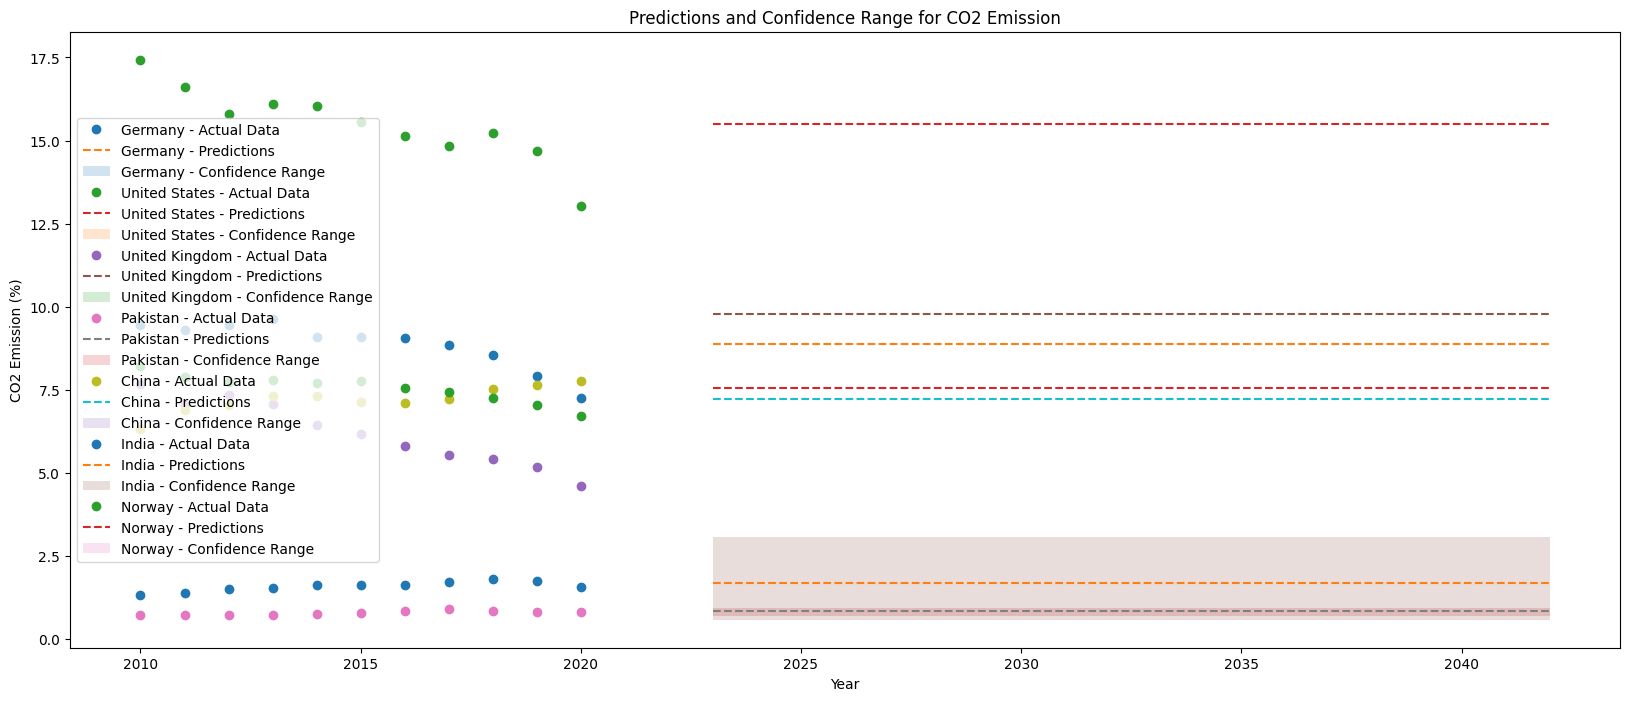

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  # Add this line to import the stats module
from scipy.optimize import curve_fit

def err_ranges(func, p, pcov, x, alpha=0.05):
    """
    Estimate the confidence range for the fitted curve.

    Parameters:
    - func: The function used for curve fitting.
    - p: Fitted parameters.
    - pcov: Covariance matrix of the fitted parameters.
    - x: x values for prediction.
    - alpha: Significance level for confidence interval.

    Returns:
    - y_lower: Lower bound of the confidence interval.
    - y_upper: Upper bound of the confidence interval.
    """
    n = len(x)
    dof = max(0, n - len(p))  # Degrees of freedom
    t_val = stats.t.ppf(1 - alpha / 2, dof)
    delta = np.sqrt(np.diag(pcov))
    y_lower = func(x, *(p - t_val * delta))
    y_upper = func(x, *(p + t_val * delta))
    return y_lower, y_upper


# Function to make predictions and plot results
def make_predictions_and_plot(data, func, title, initial_params):
    plt.figure(figsize=(20, 8))

    for country in data.index:
        x_values = pd.to_numeric(new_cols[1:], errors='coerce')
        y_values = data.loc[country, new_cols[1:]]

        # Scale x-axis values
        x_scaled = (x_values - min(x_values)) / (max(x_values) - min(x_values))

        # Fit the logistic CO2 Emission curve with adjusted initial parameters
        popt_log, pcov_log = perform_curve_fit_updated(x_scaled, y_values, logistic_function_updated, initial_params_logistic, maxfev=5000)


        if popt_log is not None:
            # Predict future values for the next 20 years
            x_future = np.arange(2023, 2043)
            y_pred = logistic_function_updated(x_future, *popt_log)

            # Estimate confidence range
            y_lower, y_upper = err_ranges(func, popt_log, pcov_log, x_future)


            # Plot the fitted curve, predictions, and confidence range
            plt.plot(x_values, y_values, 'o', label=f'{country} - Actual Data')
            plt.plot(x_future, y_pred, label=f'{country} - Predictions', linestyle='--')
            plt.fill_between(x_future, y_lower, y_upper, alpha=0.2, label=f'{country} - Confidence Range')

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission (%)')
    plt.legend()
    plt.show()

# Updated logistic growth function
def logistic_function_updated(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

# Initial parameters for the logistic growth function
initial_params_logistic = [1.0, 1.0, 1.0, 0.0]

# Make predictions and plot results for GDP growth
make_predictions_and_plot(data_CO2, logistic_function_updated, 'Predictions and Confidence Range for CO2 Emission', initial_params_logistic)


In [ ]:
# Create DataFrames for each cluster
clusters = {}
for cluster_label in range(num_clusters):
    clusters[cluster_label] = data_CO2_clustered[data_CO2_clustered['Cluster'] == cluster_label]


In [ ]:
# Select one representative country from each cluster
representative_countries = {}
for cluster_label in clusters:
    representative_countries[cluster_label] = clusters[cluster_label].iloc[0].name



In [ ]:
# Compare countries within clusters
for cluster_label, country in representative_countries.items():
    print(f"\nComparison for Cluster {cluster_label} - {country}:")
    print(clusters[cluster_label][new_cols[1:]])



Comparison for Cluster 0 - Germany:
                    2010      2011      2012      2013      2014      2015  \
Country Name                                                                 
Germany         9.453389  9.299003  9.451289  9.624229  9.088528  9.087345   
United Kingdom  7.689567  7.044843  7.344261  7.076100  6.433347  6.159376   
China           6.335420  6.901347  7.045200  7.320155  7.304713  7.145132   
Norway          8.205018  7.888271  7.725324  7.801169  7.716802  7.764859   

                    2016      2017      2018      2019      2020  2021  2022  
Country Name                                                                  
Germany         9.072972  8.858345  8.537043  7.927188  7.255221   NaN   NaN  
United Kingdom  5.824503  5.553291  5.425128  5.175842  4.601142   NaN   NaN  
China           7.105480  7.226160  7.533193  7.645436  7.756138   NaN   NaN  
Norway          7.561039  7.423752  7.261316  7.042321  6.725080   NaN   NaN  

Comparison for Clus

In [ ]:
# Compare countries from different clusters
for cluster_label1 in representative_countries:
    for cluster_label2 in representative_countries:
        if cluster_label1 != cluster_label2:
            country1 = representative_countries[cluster_label1]
            country2 = representative_countries[cluster_label2]
            print(f"\nComparison between Cluster {cluster_label1} - {country1} and Cluster {cluster_label2} - {country2}:")
            print(clusters[cluster_label1][new_cols[1:]])
            print(clusters[cluster_label2][new_cols[1:]])



Comparison between Cluster 0 - Germany and Cluster 1 - United States:
                    2010      2011      2012      2013      2014      2015  \
Country Name                                                                 
Germany         9.453389  9.299003  9.451289  9.624229  9.088528  9.087345   
United Kingdom  7.689567  7.044843  7.344261  7.076100  6.433347  6.159376   
China           6.335420  6.901347  7.045200  7.320155  7.304713  7.145132   
Norway          8.205018  7.888271  7.725324  7.801169  7.716802  7.764859   

                    2016      2017      2018      2019      2020  2021  2022  
Country Name                                                                  
Germany         9.072972  8.858345  8.537043  7.927188  7.255221   NaN   NaN  
United Kingdom  5.824503  5.553291  5.425128  5.175842  4.601142   NaN   NaN  
China           7.105480  7.226160  7.533193  7.645436  7.756138   NaN   NaN  
Norway          7.561039  7.423752  7.261316  7.042321  6.725080 

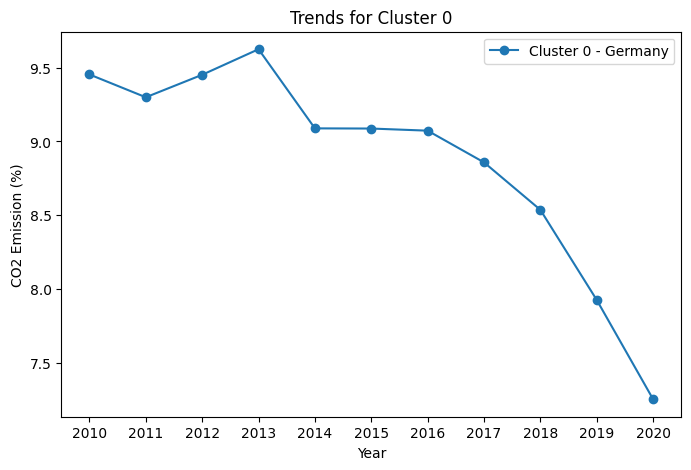

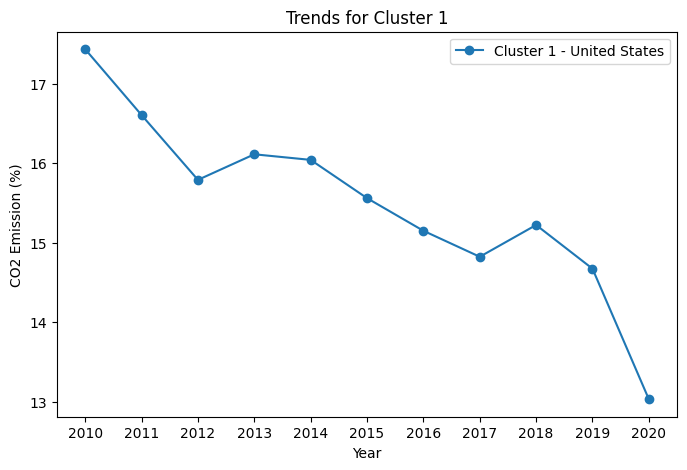

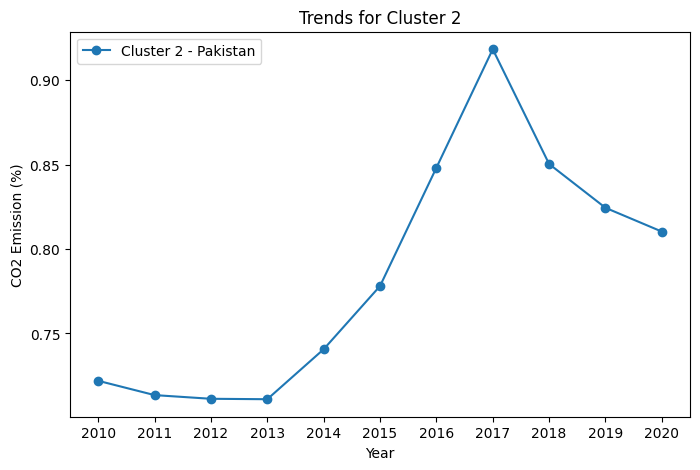

In [ ]:
# Example: Plot trends for representative countries within each cluster
for cluster_label, country in representative_countries.items():
    plt.figure(figsize=(8, 5))
    plt.plot(new_cols[1:], clusters[cluster_label].loc[country, new_cols[1:]], marker='o', label=f'Cluster {cluster_label} - {country}')
    plt.title(f'Trends for Cluster {cluster_label}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission (%)')
    plt.legend()
    plt.show()
